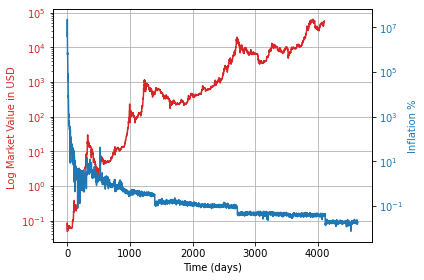

In [90]:
#import dependences
import json
import requests
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
# insert your API key here
GLASSNODE_API_KEY = os.getenv('GLASSNODE_API_KEY')
# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/supply/inflation_rate',
    params={'a': 'BTC','api_key': GLASSNODE_API_KEY})
res1 = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_close',
    params={'a': 'BTC','api_key': GLASSNODE_API_KEY})
#reading the data
price = pd.read_json(res1.text, convert_dates=['t'])
price.rename({'t' : 'Date', 'v': 'Price'}, axis=1, inplace=True)
price.set_index('Date', inplace=True)
inflation = pd.read_json(res.text, convert_dates=['t'])
inflation.rename({'t' : 'Date', 'v': 'Inflation Rate'}, axis=1, inplace=True)
inflation.set_index('Date', inplace=True)
#cleaning the data to concatenate data frames
price.reset_index(drop=True, inplace=True)
inflation.reset_index(drop=True, inplace=True)
btc = [price, inflation]
btc_df = pd.concat(btc, axis=1)
btc_df['Date'] = pd.date_range(start='2/1/2009', periods=len(btc_df), freq='D')
btc_df.set_index('Date', inplace=True)
btc_df
#plot the data
#a = btc_df.hvplot(logy=True, y=['Inflation Rate'], yaxis='left', ylabel='Inflation Rate %', xlabel='Year', title='Bitcoin Inflation Rate')
#b = btc_df.hvplot(logy=True, y=['Price'], yaxis='right', ylabel='Price', xlabel='Year', title='Bitcoin Inflation Rate')
#a * b
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Log Market Value in USD ', color=color)
ax1.set_yscale('log')
ax1.plot(price, color=color)
ax1.grid()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Inflation %', color=color)  # we already handled the x-label with ax1
ax2.set_yscale('log')
ax2.plot(inflation, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()